Importing mat plot and pandas so we can make plots and data frame

In [ ]:

import matplotlib.pyplot as plt
import pandas as pd

*General* collatz function
returns a list of steps, the sequence itself (a list), the halfway, max, and mean val

This allows easily inputting into a dataframe

In [ ]:


#collatz function
def collatz(num):
  """collats function to do the steps"""
  steps = 0
  sequence = []

  #building it dependant on if even or not
  while (num != 1):
    sequence.append(num)
    if (num%2 == 0):
      num /= 2
    else:
      num *= 3
      num += 1
    steps += 1
  sequence.append(1)

  #finding the halfway, max, and mean for the dataset
  halfway = sequence[len(sequence) // 2]
  maxVal = max(sequence)
  meanVal = sum(sequence) / len(sequence)

  return [steps, sequence, halfway, maxVal, meanVal]

sequenceLengths = []

for i in range(1, 10001):
  leng = collatz(i)[0]
  sequenceLengths.append([i, leng])




[2, [4, 2.0, 1], 2.0, 4, 2.3333333333333335]


Graphing the sequence lengths for analyzing patterns visually

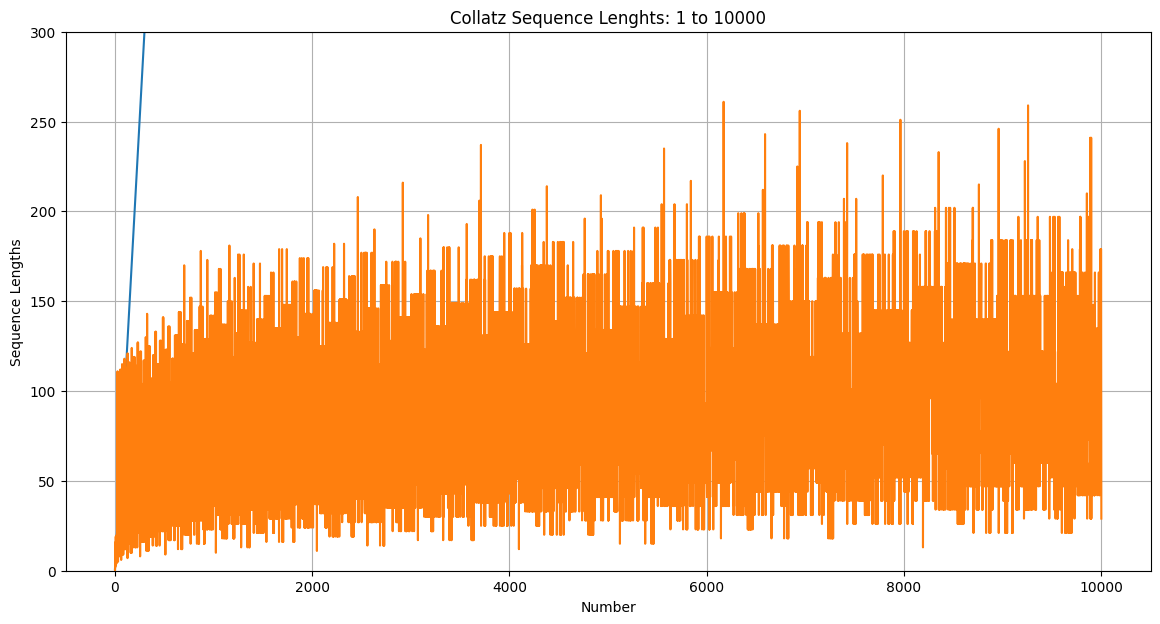

In [ ]:
"""Mat Plot Lib for the Collatz Sequence Lengths"""

#x axis plot (numbers)
nums = [i[0] for i in sequenceLengths]
#y axis plot (sequenceLengths)
lengths = [i[1] for i in sequenceLengths]

#plotting using mat plot lib
plt.figure(figsize=(14, 7))
plt.plot(nums, sequenceLengths)
plt.title('Collatz Sequence Lenghts: 1 to 10000')
plt.xlabel('Number')
plt.ylabel('Sequence Lengths')
plt.ylim(0, 300) # making sure only the applicable range is displayed
plt.grid(True)
plt.show()


Plotting three different sequences so that trends can be analyzed about the longest, middle, and shortest sequence

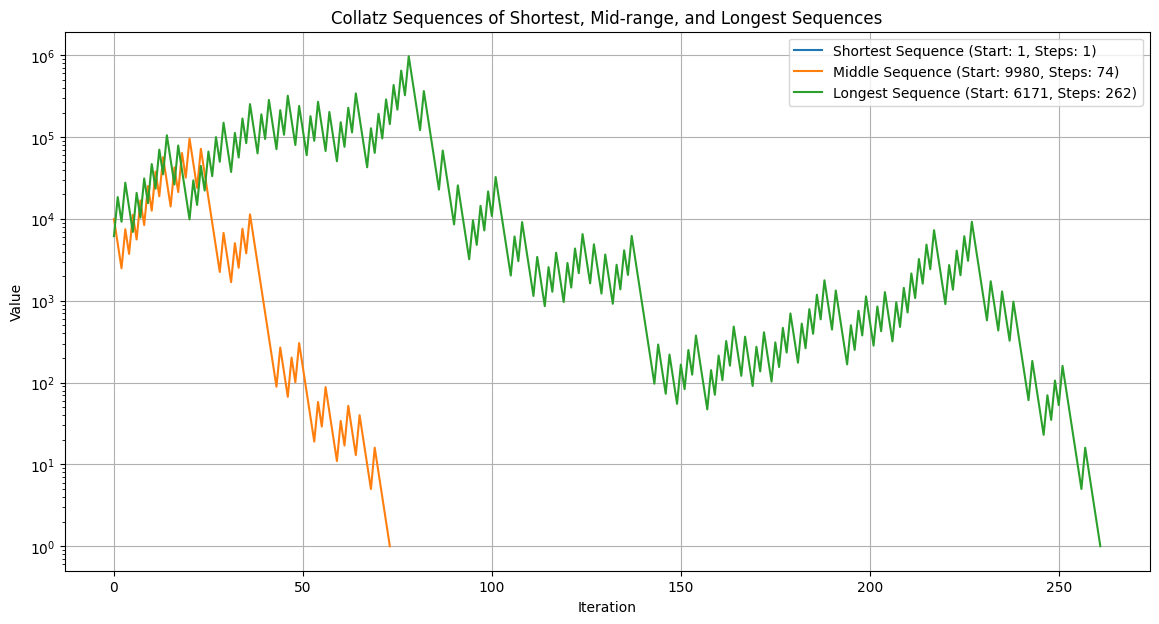

In [ ]:
"""Mat Plot Lib for the three interesting sequences"""

#sorting sequence lengths so we can find short, mid, and long
sequenceLengths.sort(key=lambda x:x[1])

#finding shortest, longest, and mid length sequences
shortest = sequenceLengths[0][0] #number with the shortest -> first index in the list
shortestSeq = collatz(shortest)[1]
longest = sequenceLengths[-1][0]
longestSeq = collatz(longest)[1]
middle = sequenceLengths[len(sequenceLengths) // 2][0]
midSeq = collatz(middle)[1]

#plotting
plt.figure(figsize=(14,7))
plt.plot(shortestSeq, label=f'Shortest Sequence (Start: {shortest}, Steps: {len(shortestSeq)})')
plt.plot(midSeq, label=f'Middle Sequence (Start: {middle}, Steps: {len(midSeq)})')
plt.plot(longestSeq, label=f'Longest Sequence (Start: {longest}, Steps: {len(longestSeq)})')

plt.title('Collatz Sequences of Shortest, Mid-range, and Longest Sequences')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.yscale('log')
plt.legend()
plt.grid(True)
plt.show()






Dataset with pandas so that it can be downloaded to csv

In [ ]:
"""Creating Dataset with Pandas"""

#building dictionary with data
data = {
    "Number": [],
    "Sequence Length": [],
    "Final Halfway Point": [],
    "Max Value in Sequence": [],
    "Mean Value in Sequence": []
}

#building the data frame for all numbers from 1 to 10000
for i in range(1, 10001):
  steps, sequence, halfway, maxVal, meanVal = collatz(i)
  data["Number"].append(i)
  data["Sequence Length"].append(steps)
  data["Final Halfway Point"].append(halfway)
  data["Max Value in Sequence"].append(maxVal)
  data["Mean Value in Sequence"].append(meanVal)

df = pd.DataFrame(data)



    Number  Sequence Length  Final Halfway Point  Max Value in Sequence  \
0        1                0                  1.0                    1.0   
1        2                1                  1.0                    2.0   
2        3                7                  8.0                   16.0   
3        4                2                  2.0                    4.0   
4        5                5                  4.0                   16.0   
5        6                8                 16.0                   16.0   
6        7               16                 40.0                   52.0   
7        8                3                  2.0                    8.0   
8        9               19                 13.0                   52.0   
9       10                6                  8.0                   16.0   
10      11               14                 20.0                   52.0   
11      12                9                 16.0                   16.0   
12      13               

**Reflection:**

When building the dataframe, I expected to find at least some trends between the steps being that as you increase the value, you are going to get more steps to get back to 1. This naturaly made sense to me since you are at a higher starting point meaning to get to the lowbound, it would take longer.

This however, was not the case. When looking at a graph of the steps it takes for numbers 1 to 10000, there is a small general trend up, however, there is no actual trend, with the graph have a large amount of numnbers taking rouglhy the mean amount of steps, but also a large amount of numbers that just have randomly high steps or randomly low steps, truly following the random walk theory that we discussed in class not following any trends.

In terms of the shortest, middle, and longest sequence, there was nothing special about them again, looking like a random curve. One interesting thing is that when the number drops, it generally drops significantly even if it has a later rise with the rate change (derivative) over that given time frame changing significantly.

I hypothesize what mathematicians do being that this is truly a random path and there is not much that we can learn or take away from this.

Making Collatz Function Recursive

In [ ]:
""" Optimizing Collatz Function -> making it recursive -> bonus!"""

def optimizedCollatz(num, steps=0, sequence=None):
  """recursive version of collatz"""

  #initialize sequence when first made
  if sequence is None:
    sequence = []

  sequence.append(num)

  #base case -> breaks when num is 1
  if num == 1:
    halfway = sequence[len(sequence) // 2]
    maxVal = max(sequence)
    meanVal = sum(sequence) / len(sequence)
    return [steps, sequence, halfway, maxVal, meanVal]

  #if even -> return halfed number, add 1 to steps, and then build sequence
  if num%2 == 0:
    return optimizedCollatz(num // 2, steps + 1, sequence)
  #if ood => do the same but do 3x + 1 scenario
  else:
    return optimizedCollatz(num*3 + 1, steps + 1, sequence)

#testing
sequenceLengthsRecursive = []

for i in range(1, 10001):
  leng = optimizedCollatz(i)[0]
  sequenceLengthsRecursive.append([i, leng])

print(sequenceLengthsRecursive)

I made the collatz function optimized by making it reursive.

First, the function intitializes the list.

The base case (exit case) is when the sequence reaches 1. If not, it determines whether the number is even or add, and then calls the functin recursive based on that. Every iteration, it appends the current num to the sequence. This is much more efficient as it is running at log(n) time complexity rather than linear time complexity.

downloading to csv to explore possible correlations between columns

In [ ]:
"""Extending Dataset"""

data = {
    "Number": [],
    "Sequence Length": [],
    "Final Halfway Point": [],
    "Max Value in Sequence": [],
    "Mean Value in Sequence": []
}

# Extending data frame to 100000 values -> more analysis
for i in range(1, 100001):
    steps, sequence, halfway, maxVal, meanVal = collatz(i)
    data["Number"].append(i)
    data["Sequence Length"].append(steps)
    data["Final Halfway Point"].append(halfway)
    data["Max Value in Sequence"].append(maxVal)
    data["Mean Value in Sequence"].append(meanVal)


df = pd.DataFrame(data)

# Save to a CSV file
df.to_csv('collatzSequence100000.csv', index=False)

**Reflection on new data set**

Based on the new data set that I created and saved it to a csv, I was able to analyze new trends. I plotted it as well using excel but I was not able to find any other trends than the general spikes that I had seen previously.

This was interesting because it showed that this is a truly random pattern and does not fully any trends even by extending the dataset by an order of magnitutde still does not change anything about the trends that the dataset follows.